In [1]:
# Add Code Directory (TEMPORY FIX)
import sys
sys.path.append('/home/jhrag/Code')

In [2]:
import numpy as np
from NI_simulation.modules import ni_sim
from scipy import signal
from matplotlib import pyplot as plt
from scipy.io import wavfile
import scipy.io

%load_ext autoreload
%autoreload 2

## Add Fin Whale File

In [3]:
Fs, fin = wavfile.read('./atlfin_128_64_0-50-FinWhaleAtlantic-10x.wav',)

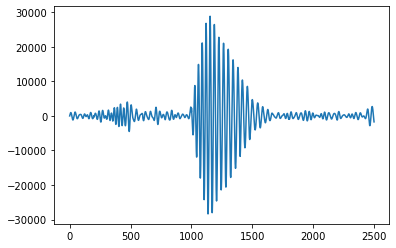

In [4]:
plt.plot(fin[26000:28500])

In [5]:
fin200 = signal.decimate(fin, 4,zero_phase=True)

In [6]:
print(fin.shape)
print(fin200.shape)

(147908,)
(36977,)


In [8]:
fin200_expanded = np.tile(fin,(10,))
print(fin200_expanded.shape)
print(fin200.shape)

(1479080,)
(36977,)


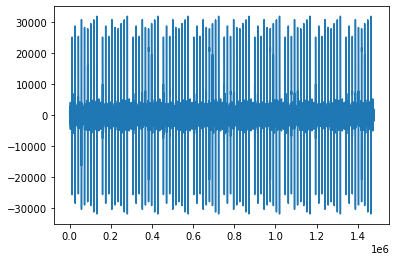

In [9]:
plt.plot(fin200_expanded)

(14.0, 16.0)

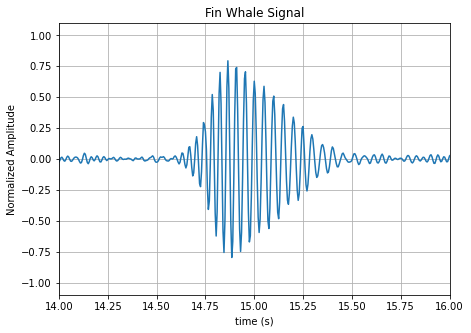

In [35]:
tfin = np.arange(0,len(fin200)/200, 1/200)
fig = plt.figure(figsize=(7,5))
plt.plot(tfin, fin200/np.max(fin200))
plt.xlabel('time (s)')
plt.ylabel('Normalized Amplitude')
plt.grid()
plt.xlim([tfin[0], tfin[-1]])
plt.title('Fin Whale Signal')
plt.xlim([14, 16])

fig.savefig('fin_whale_signal_zoomed.png',dpi=300)

## Add Fin Whale Model

In [138]:
source_distribution = ni_sim.source_distribution2D()
source_distribution.endfire_circle(10,10000,100)
source_distribution.fin_whale_dist(12000, 12100, 10, 70, deg=135)
sources = source_distribution.sources


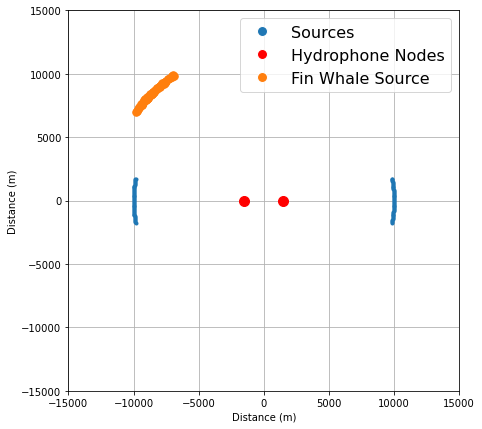

In [139]:
env = ni_sim.environment(sources, time_length=60)
xA, xB = env.get_signals()
fig, ax = env.plot_env()
plt.ylim([-15000, 15000])
plt.xlim([-15000, 15000])

fig.savefig('fin_whale_environment.png', dpi=300)

(-5.0, 5.0)

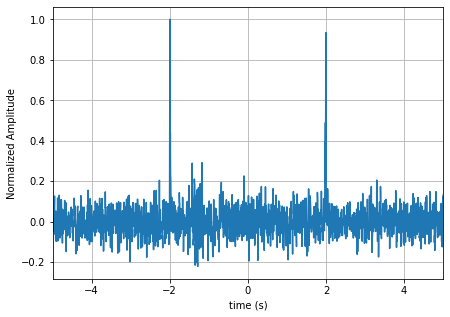

In [140]:
R = signal.fftconvolve(xA, np.flip(xB))
tx = np.linspace(-env.time_length, env.time_length, len(R))

fig = plt.figure(figsize=(7,5))
plt.plot(tx,R/np.max(R))

plt.grid()
plt.xlabel('time (s)')
plt.ylabel('Normalized Amplitude')
plt.xlim([-5, 5])
#fig.savefig('fin_whale_model_dt_3.png',dpi=300)

Text(0, 0.5, 'amplitude')

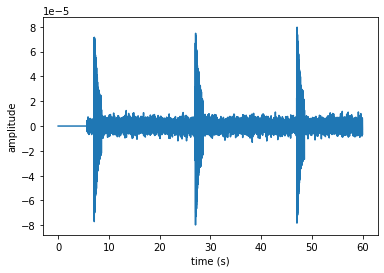

In [108]:
t = np.linspace(0, len(xA)/200, len(xA))
plt.plot(t, xA)
plt.xlabel('time (s)')
plt.ylabel('amplitude')

Text(0, 0.5, 'amplitude')

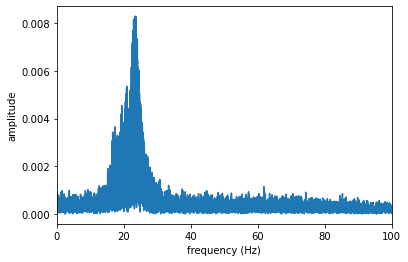

In [109]:
n = int(16384)
f = np.linspace(0,200,n)
plt.plot(f, np.abs(scipy.fft.fft(xA, n=n)))
plt.xlim([0,100])
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')


## Modeling Fin Whale Calls

In [64]:
dt = 2
f0 = 25
f1 = 15
T = 20
t = np.arange(0,dt, 1/200)

#win = signal.windows.gaussian(len(chirp),len(chirp)/6)
win = np.exp(-t*1)
chirp = signal.chirp(t,f0,dt,f1)*win

chirp_padded = np.zeros(T*200)
chirp_padded[:len(chirp)] = chirp
t_pad = np.linspace(0,T,len(chirp_padded))
chirp_resampled = signal.resample(chirp_padded, len(chirp_padded)*4)

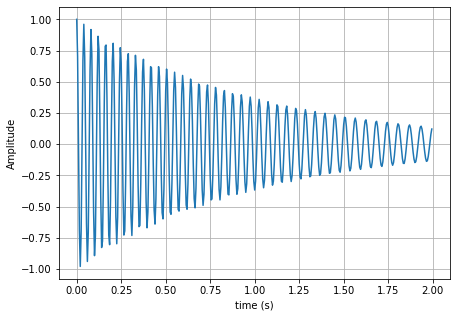

In [152]:
fig = plt.figure(figsize=(7,5))
plt.plot(t, chirp)
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('Amplitude')

fig.savefig('Fin_model_plot.png',dpi=300)

In [76]:
# Repeat chirp
n_tile = int(np.ceil(env.time_length*200/len(chirp_padded)))

chirp_extended = np.tile(chirp_padded, n_tile)

In [55]:
# write to wave file
from scipy.io.wavfile import write
write("model_fin.wav", 8000, chirp_resampled)

(12000,)


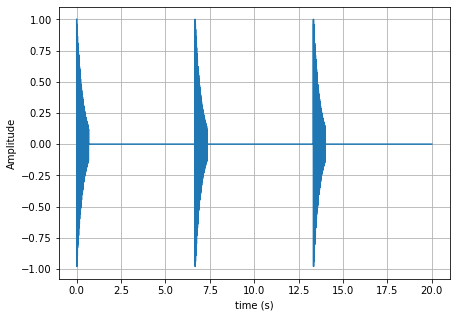

In [155]:
tx = np.linspace(0, T, len(chirp_extended))
fig = plt.figure(figsize=(7,5))
plt.plot(tx, chirp_extended)
plt.grid()
print(chirp_extended.shape)
plt.xlabel('time (s)')
plt.ylabel('Amplitude')

fig.savefig('repeated_fin_whale_signal.png', dpi=300)

In [177]:
sources

,X,Y,label
0,9848.077530,-1736.481777,gauss
1,9860.197876,-1666.282644,gauss
2,9871.817834,-1595.998950,gauss
3,9882.936815,-1525.634263,gauss
4,9893.554255,-1455.192152,gauss
...,...,...,...
95,-9893.554255,-1455.192152,gauss
96,-9882.936815,-1525.634263,gauss
97,-9871.817834,-1595.998950,gauss
98,-9860.197876,-1666.282644,gauss


In [201]:
deg_bound = np.deg2rad(10)

(np.abs(np.arctan2(1, -10)-np.pi) < deg_bound)

True

In [193]:
np.arctan2(0,-5)

3.141592653589793

## Experimenting with bearing

         X             Y  label
0  10000.0  0.000000e+00  gauss
1 -10000.0  1.224647e-12  gauss


(-5.0, 5.0)

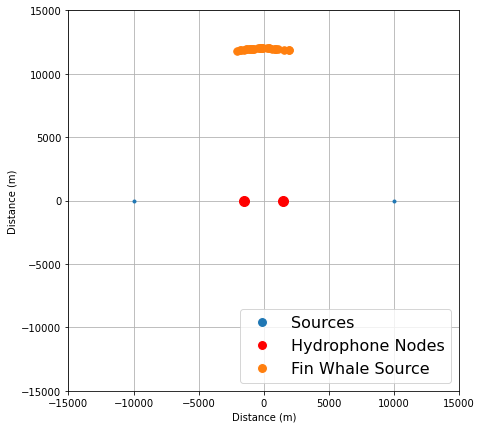

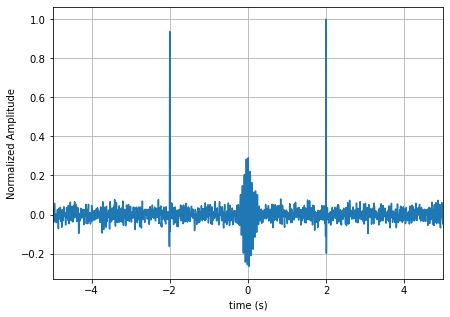

In [10]:
deg = 90
source_distribution = ni_sim.source_distribution2D()
source_distribution.endfire_circle(0,10000,3)
source_distribution.fin_whale_dist(12000, 12001, 10, 10, deg=deg)
sources = source_distribution.sources

env = ni_sim.environment(sources, time_length=60)
xA, xB = env.get_signals(no_whale=True)
fig, ax = env.plot_env()
plt.ylim([-15000, 15000])
plt.xlim([-15000, 15000])

#fig.savefig(f'bearing_env_{deg}.png', dpi=300)
R = signal.fftconvolve(xA, np.flip(xB))
tx = np.linspace(-env.time_length, env.time_length, len(R))

fig = plt.figure(figsize=(7,5))
plt.plot(tx,R/np.max(R))

plt.grid()
plt.xlabel('time (s)')
plt.ylabel('Normalized Amplitude')
plt.xlim([-5, 5])

#fig.savefig(f'bearing_nccf_{deg}.png', dpi=300)

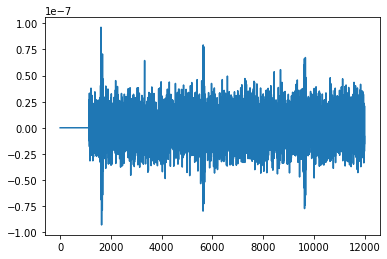

In [9]:
plt.plot(xA)